# 图形种类

In [15]:
import matplotlib.pyplot as plt
import numpy as np

除了前面例子中使用的 `plt.scatter()` 画散点图，`plt.plot()` 画点线图，Matplotlib 还有多种图形方法可供选择，这里介绍柱状图、茎叶图、饼图、直方图和箱线图，其他图形可以参考其官网网站。

## `.bar()` 柱状图

柱状图是一种常见的统计图表，用于展示不同类别或组之间的数量关系。它通过在坐标轴上以柱状的形式表示数据，直观地展示了各类别之间的相对大小或变化趋势。

在柱状图中，通常横轴表示不同的类别或组，纵轴表示数量或其他度量。每个类别或组都用一个垂直的柱子表示，其高度代表相应数据的数值。

`.bar()` 方法绘制柱状图时有很多参数，除了必须指定横坐标和纵坐标之外，还可以用 `width` 参数指定每个柱子的宽度，`edgecolor` 参数和 `linewidth` 参数指定边缘线颜色、宽度，`facecolor` 参数指定内部的颜色等。可以通过下面的例子体会一下。

例：A 类别对应的值为 4.8，B 类别对应的值为 5.5，C 类别对应的值为 3.5，D 类别对应的值为 4.6，画出各类别的柱状图。

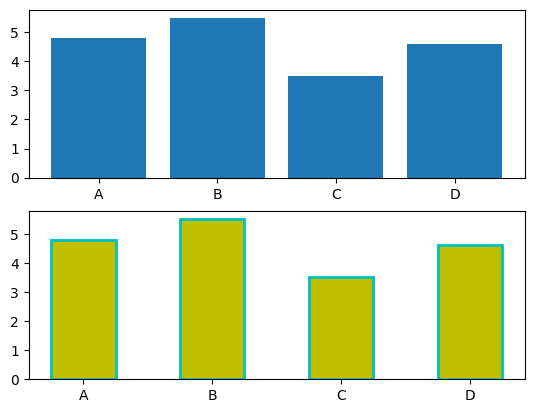

In [16]:
x = ['A','B','C','D']
y = [4.8, 5.5, 3.5, 4.6]

# plot
fig, ax = plt.subplots(2,1)
ax[0].bar(x, y)
ax[1].bar(x, y, width=0.5, facecolor='y',edgecolor="c", linewidth=2)


plt.show()

## `.stem()` 茎叶图

茎叶图强调每个数据点的具体值，并在该值处绘制垂直线。这种图形常用于显示数据的分布和变化趋势。

与传统的柱状图（bar chart）相比，`stem` 图更注重显示每个数据点的具体值，而不是强调整体的分布。这使得 `stem` 图在特定情境下更具优势，尤其是当关注数据点的绝对值时。

例：使用柱状图的数据画茎叶图，并依次调整

（1）每个数据点处使用红色圆圈标记；

（2）用绿色实线作为基线


（3）蓝色虚线连接垂直线。


Text(0.5, 1.0, 'modify linefmt')

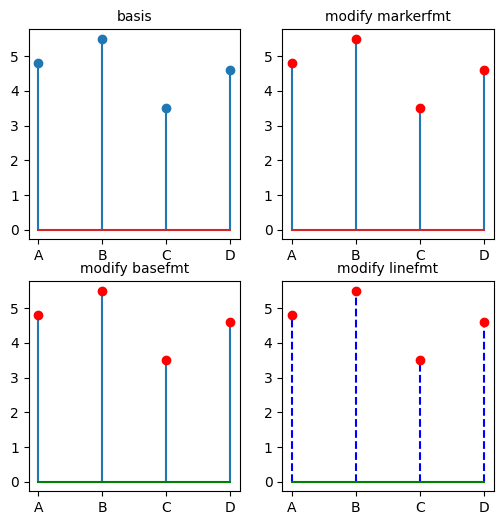

In [17]:
## 柱状图的数据
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax[0,0].stem(x, y)
ax[0,0].set_title('basis',size=10)
#（1）每个数据点处使用红色圆圈标记；
ax[0,1].stem(x, y, markerfmt='ro')
ax[0,1].set_title('modify markerfmt',size=10)
#（2）用绿色实线作为基线
ax[1,0].stem(x, y, markerfmt='ro', basefmt='g-')
ax[1,0].set_title('modify basefmt',size=10)
#（3）蓝色虚线连接垂直线。
ax[1,1].stem(x, y, markerfmt='ro', basefmt='g-', linefmt='b--')
ax[1,1].set_title('modify linefmt',size=10)


## `.pie()` 饼图

用于表示整体中各部分的相对比例。它通常以圆形的方式展示数据，将整个圆分为扇形，每个扇形的角度表示相应部分占总体的比例。通常用于展示分类数据的占比比较。

例：对一个列表画图，需要先统计不同元素出现的次数，转为字典，将字典中的值作为数据，字典中的键作为标签参数传入。

- `autopct='%1.1f%%'` 参数用于显示每个元素占比的百分比，`%1.1f` 这部分是格式说明符，表示显示一个浮点数，其中包含一位小数；`%%` 是一个转义序列，用于显示百分号；

- `color` 参数用于自定义每个部分的颜色。

- `startangle` 参数设置起始角度为 45 度。

统计结果为{'A': 2, 'B': 1, 'C': 1}


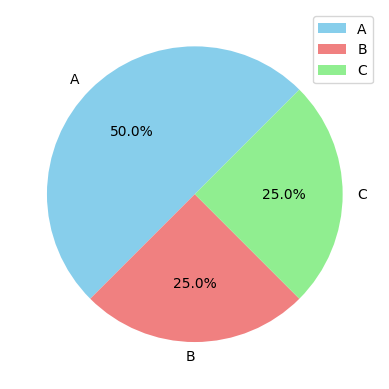

In [18]:
X = ['A','B','C','A']
# 统计各元素出现的次数
counts = {label: X.count(label) for label in set(X)}
print('统计结果为{}'.format(counts))
# 饼图
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=45, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.legend()

## `.hist()` 直方图

直方图是一种用于可视化数据分布的图表类型，通过将数据划分为多个连续的区间（也称为箱子或柱 (`bins`)），并在每个区间内绘制相应的频率或数量来展示数据的分布情况。直方图常用于了解连续型数据（有连续取值的变量，比如身高、体重）的中心趋势、离散程度和异常值。

该函数也有类似的许多参数，比较重要的是设置分箱数 `bins`，请看下例对随机生成的 200 个正态分布数据分别分为 8 组和 18 组的作图情况：

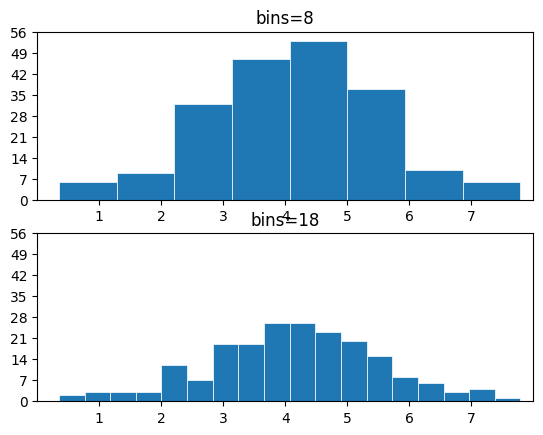

In [19]:
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)
fig, ax = plt.subplots(2,1)

ax[0].hist(x, bins=8, linewidth=0.5, edgecolor="white")
ax[0].set_title('bins=8')
ax[0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))


ax[1].hist(x, bins=18, linewidth=0.5, edgecolor="white")

ax[1].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))
ax[1].set_title('bins=18')

plt.show()

## `.boxplot()` 箱线图

箱线图是一种用于汇总和比较多个数据集分布的有效可视化工具，可以显示数据的中心趋势、离散程度以及异常值情况。
参数有：
- `positions`：设置箱线图的位置，即在 x 轴上的位置。
- `widths`：设置箱体的宽度。
- `patch_artist=True`：将箱体以及中位数点着色。
- `showmeans=False/True` 和 `showfliers=False/True`：是否显示均值点和异常值。
- `medianprops`, `boxprops`, `capprops`：用于设置中位数线、箱体和异常值的样式，具体设置可以用字典的形式表示，比如 {'color':'white','linewidth':0.5}。

例：对随机生成的 100 行和 3 列的三维正态分布的数据作出三组箱线图。

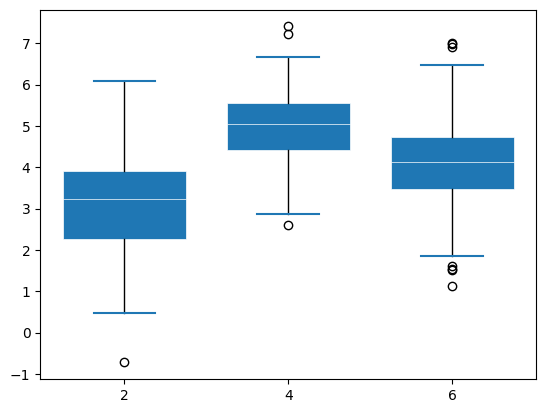

In [20]:
np.random.seed(10)
#生成一个包含 100 行和 3 列的三维正态分布的数据
#均值分别为 (3, 5, 4)，标准差分别为 (1.25, 1.00, 1.25)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))
# plot
fig, ax = plt.subplots()
ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                capprops={"color": "C0", "linewidth": 1.5})

plt.show()